<a href="https://colab.research.google.com/github/lln-cid20/prog-ciencia-dados/blob/master/trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **APRESENTAÇÃO**

**Resumo**

Este trabalho, realizado como trabalho final da disciplina de Programação para Ciência de Dados, do curso de Pós-graduação em Ciência de Dados, apresenta os resultados da análise sobre uma base de dados de tweets, procurando identificar as diversas perguntas feitas no período da coleta, bem como classificar as perguntas conforme os tipos a seguir: sintomas, tratamento, entidades e pessoas.


**Autores**



*   Levi Delmiro De Souza Bessa
*   Lelson Lopes Nascimento




# **TRABALHO**

# 1 - Importação de Bibliotecas

Aqui são carregadas as bibliotecas básicas usadas no projeto



In [1]:
import numpy as np
import pandas as pd


Instalamos a biblioteca PyDrive para manipular arquivos no Google Drive

In [2]:
!pip install -U -q PyDrive

In [3]:
# importa a biblioteca de manipulação de arquivos CSV
import csv
# Importa bibliotecas que permitem ler o CSV para o Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 2 - Carga do arquivo com os tweetes

Autenticar e criar o PyDrive client.

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Obter o arquivo do Google Drive usando o id do documento

In [5]:

downloaded = drive.CreateFile({"id":"19XzSWYcWbew7PHTCCb6QZXLKX0GSp7HC"})
downloaded.GetContentFile("dados-curso-completo.csv")  

Ler o arquivo usando o dataframe panda 

In [7]:


dados = pd.read_csv("dados-curso-completo.csv") 

# 3 - Verificação inicial dos dados

Apresentar o tipo de dados

In [8]:
type(dados)


pandas.core.frame.DataFrame

Mostrar os primeiros registros do banco de dados importado

In [9]:
dados.head(5)


,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0,138,pt,NaN,NaN,NaN,NaN,NaN,[]
1,2020-03-18 03:18:14,Seu Zé da Farmácia,seuzedafarmacia,"Em ação preventiva, o Governo do Estado suspen...",0,56,pt,NaN,NaN,NaN,NaN,NaN,[]
2,2020-03-29 12:09:27,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanci...,0,5,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[]
4,2020-03-19 17:49:40,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\n\nSolicite seu...,0,124,pt,Brasília,Brazil,BR,-47.8778,-15.77691,[]


Criação de uma coluna para agrupar tweets de forma diária

In [10]:
dados['data_inversa'] = pd.to_datetime(dados['data'],yearfirst=True, format='%Y-%m-%d')

Agrupar os dados com base na nova coluna, criando um dataframe com os dados agrupados

In [11]:
dados_sumario = dados['data_inversa'].groupby(dados['data_inversa'].dt.to_period('D')).agg('count').to_frame()

Criar coluna para contagem de tweets

In [12]:
dados_sumario.columns = ['cont_tweets']

Mostrar os primeiros registros do dataframe de valores agregados por dia

In [13]:
dados_sumario.head(5)

,cont_tweets
data_inversa,
2020-01-01,28
2020-01-02,70
2020-01-03,71
2020-01-04,79
2020-01-05,69


Total de registros na base de dados

In [14]:
print(dados.count)

<bound method DataFrame.count of                         data  ...        data_inversa
0        2020-03-23 18:51:14  ... 2020-03-23 18:51:14
1        2020-03-18 03:18:14  ... 2020-03-18 03:18:14
2        2020-03-29 12:09:27  ... 2020-03-29 12:09:27
3        2020-04-01 21:11:07  ... 2020-04-01 21:11:07
4        2020-03-19 17:49:40  ... 2020-03-19 17:49:40
...                      ...  ...                 ...
1658820  2020-03-13 17:26:18  ... 2020-03-13 17:26:18
1658821  2020-05-12 13:02:34  ... 2020-05-12 13:02:34
1658822  2020-03-19 18:16:30  ... 2020-03-19 18:16:30
1658823  2020-04-07 18:14:45  ... 2020-04-07 18:14:45
1658824  2020-06-02 16:04:51  ... 2020-06-02 16:04:51

[1658825 rows x 14 columns]>


Apresentar um gráfico de linhas visando mostrar a evolução do número de tweets ao longo do tempo

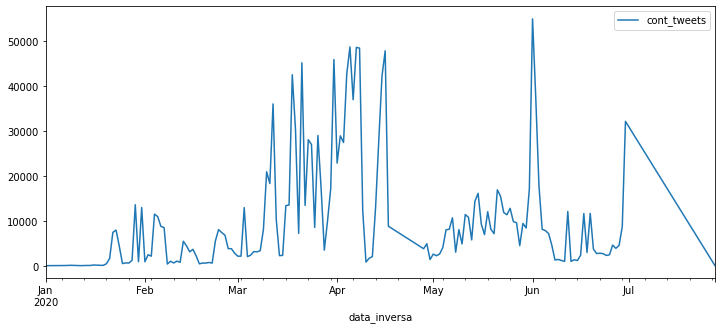

In [15]:
dados_sumario.plot(figsize=(12,5))

# 4 - Extração da Base de dados de perguntas dentre os tweets

# 5 - Classificação das perguntas conforme o foco


# 6 - Gráficos da Base Classificada

# 7 - Conclusões